#Classification metrics:
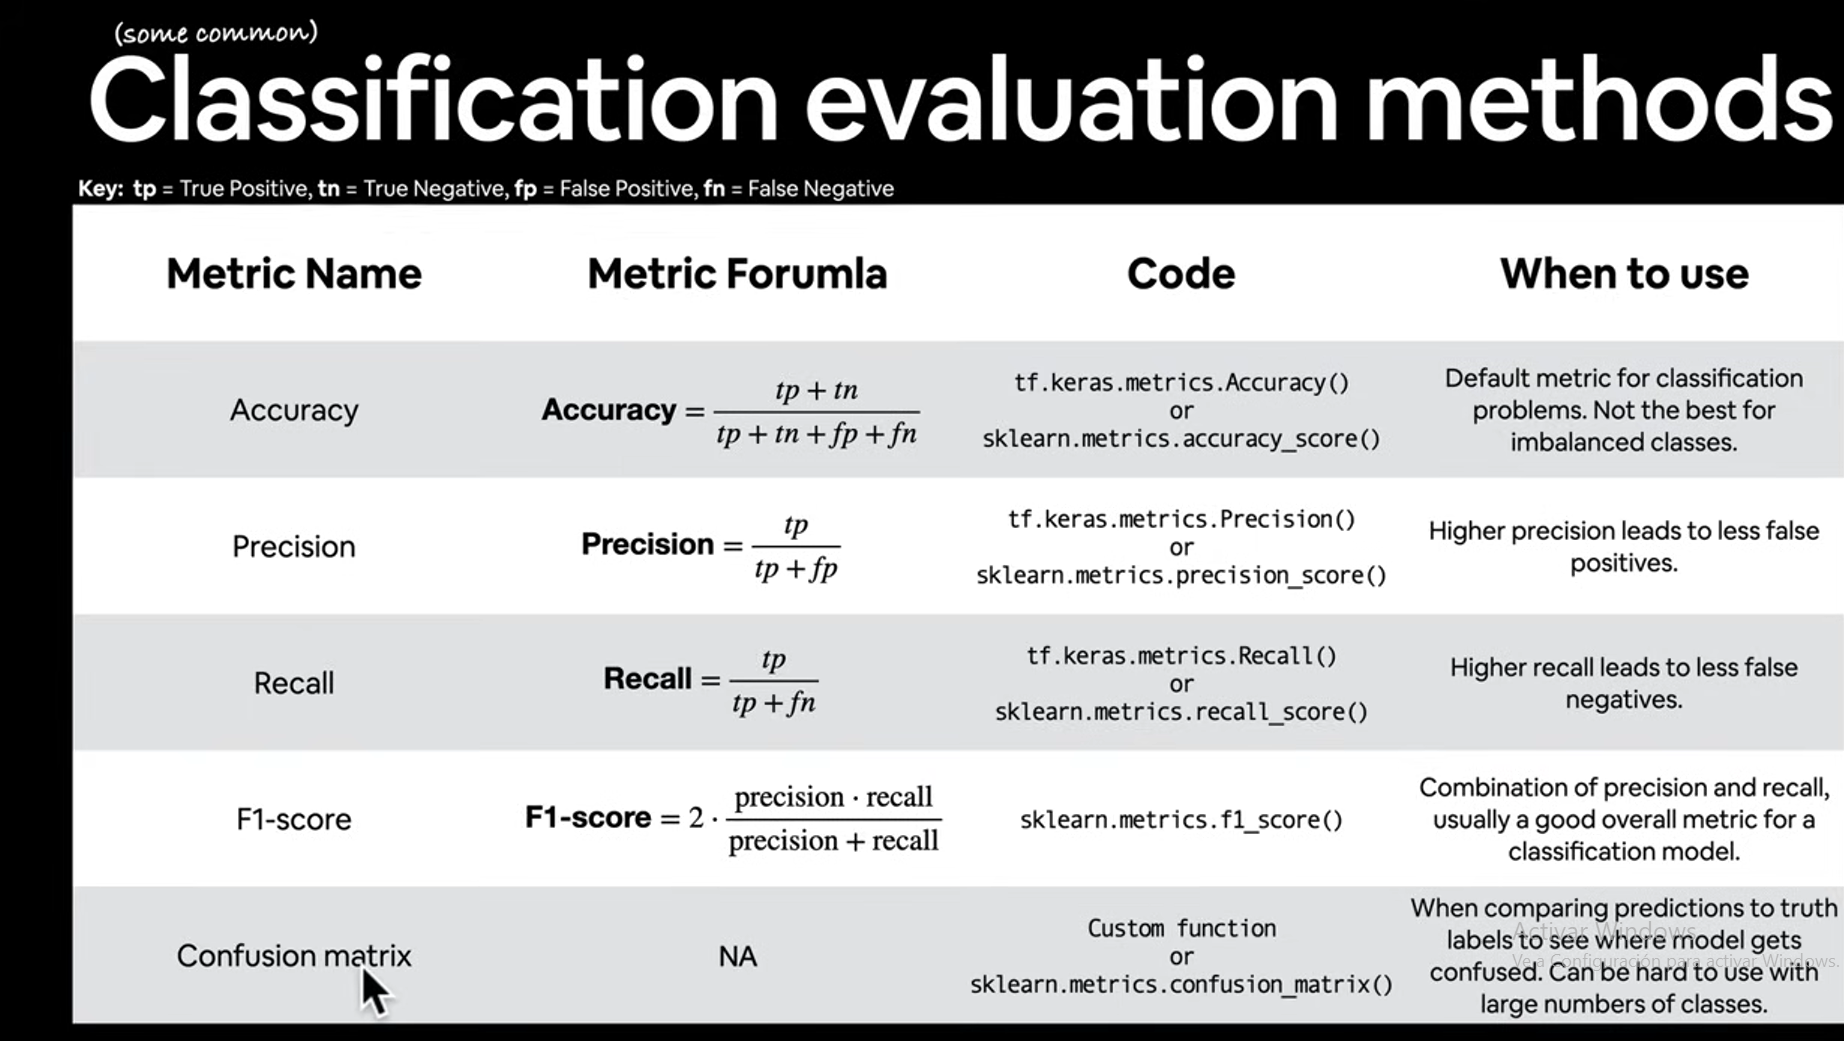

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to (28, 28) for the model input
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the neural network model
model3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00078),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model3.summary()

# Train the model
history3 = model3.fit(train_images, train_labels, epochs=30,
                     batch_size=128, validation_split=0.1)

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                         

In [2]:
loss, accuracy = model3.evaluate(test_images, test_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy*100):.2f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9779
Loss: 0.08662472665309906
Accuracy: 97.79


313/313 [==============================] - 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 971    1    0    0    0    1    4    1    1    1]
 [   0 1127    2    0    0    0    3    1    2    0]
 [   3    3 1009    3    2    0    1   

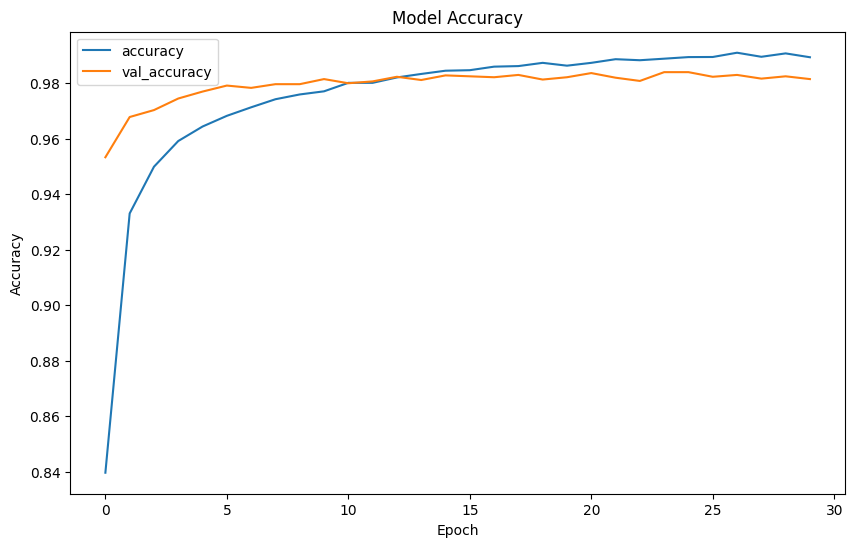

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities and classes for test set
y_prob = model3.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Calculate evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Calculate precision, recall, f1-score manually
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate AUC score for ROC curve
# We'll use the probabilities for the positive class (digit 1)
auc = roc_auc_score(test_labels[:, 1], y_prob[:, 1])
print("AUC:", auc)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

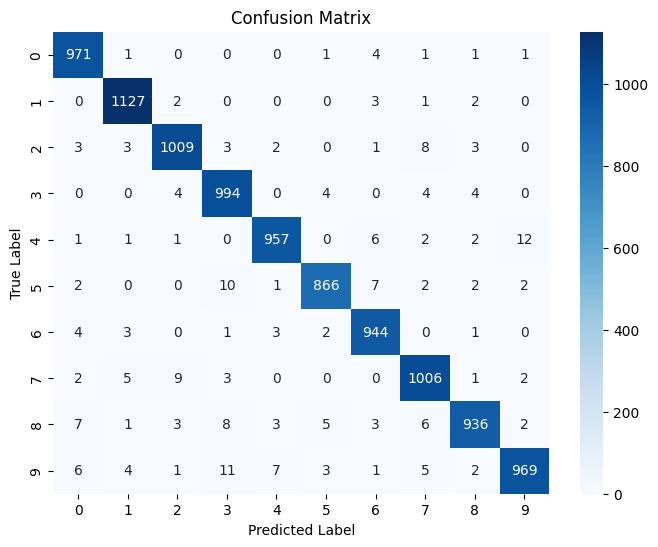

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

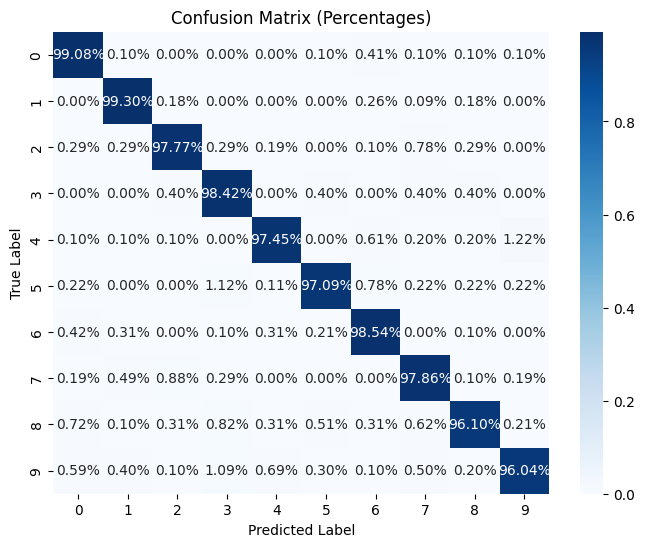

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages from confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Calculate row-wise percentages

# Plot confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#With Fashion MNIST dataset:

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                         

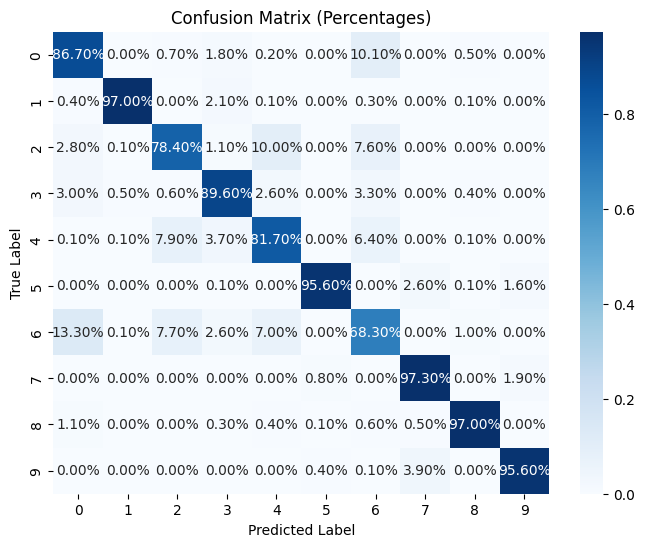

AUC: 0.9911375777777778


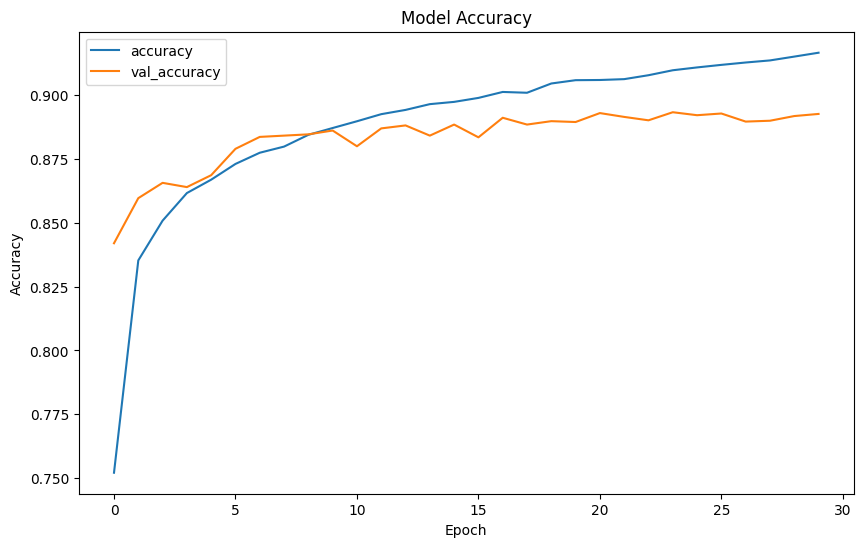

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (28, 28) for the model input
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# Convert labels to one-hot encoding (for 10 classes)
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the neural network model
model4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00078),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display model architecture
model4.summary()

# Train the model
history4 = model4.fit(train_images, train_labels, epochs=30,
                      batch_size=128, validation_split=0.1)

# Evaluate the model on test data
y_prob = model4.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate AUC score for ROC curve
auc = roc_auc_score(test_labels, y_prob, multi_class='ovr')
print("AUC:", auc)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/3
469/469 [==============================] - 8s 15ms/step - loss: 90.6342 - accuracy: 0.3110


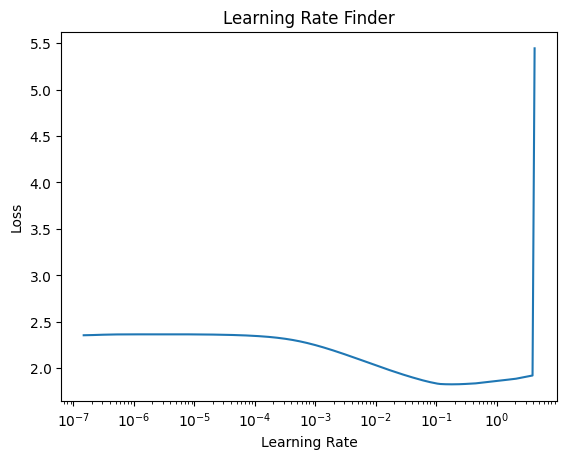

In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class LearningRateFinder(Callback):
    """Custom callback to find optimal learning rate."""

    def __init__(self, start_lr=1e-7, end_lr=10, num_batches=None, smooth_beta=0.98):
        super(LearningRateFinder, self).__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.num_batches = num_batches
        self.smooth_beta = smooth_beta
        self.history = {}

    def on_train_begin(self, logs=None):
        self.learning_rates = []
        self.losses = []
        self.best_loss = 1e9
        self.avg_loss = 0
        self.batch_num = 0

    def on_batch_begin(self, batch, logs=None):
        self.learning_rate = self._get_learning_rate()
        tf.keras.backend.set_value(self.model.optimizer.lr, self.learning_rate)

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')

        # Compute smoothed loss
        self.batch_num += 1
        self.avg_loss = self.smooth_beta * self.avg_loss + (1 - self.smooth_beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.smooth_beta**self.batch_num)

        # Check if the loss is exploding
        if self.batch_num > 1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.batch_num == 1:
            self.best_loss = smoothed_loss

        self.learning_rates.append(self.learning_rate)
        self.losses.append(smoothed_loss)

    def _get_learning_rate(self):
        # Compute the learning rate for the current batch
        return self.start_lr * (self.end_lr / self.start_lr) ** (self.batch_num / self.num_batches)

    def plot_loss(self, skip_begin=10, skip_end=1):
        """Plot the learning rate range test."""
        import matplotlib.pyplot as plt

        lrs = self.learning_rates[skip_begin:-skip_end]
        losses = self.losses[skip_begin:-skip_end]

        plt.plot(lrs, losses)
        plt.xscale('log')
        plt.xlabel('Learning Rate')
        plt.ylabel('Loss')
        plt.title('Learning Rate Finder')
        plt.show()

def build_model():
    """Build a simple neural network model."""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def find_learning_rate(train_images, train_labels, batch_size=128, epochs=1):
    """Perform learning rate range test."""
    model = build_model()

    # Compute number of batches per epoch
    num_samples = len(train_images)
    num_batches = num_samples // batch_size

    lr_finder = LearningRateFinder(num_batches=num_batches)

    # Perform learning rate range test
    model.fit(train_images, train_labels,
              batch_size=batch_size, epochs=epochs,
              callbacks=[lr_finder])

    # Plot the learning rate range test
    lr_finder.plot_loss()

# Example usage:
(train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

# Reshape data for training
train_images = train_images.reshape((-1, 28, 28))
train_labels = train_labels.astype(int)

# Perform learning rate range test
find_learning_rate(train_images, train_labels, batch_size=128, epochs=3)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

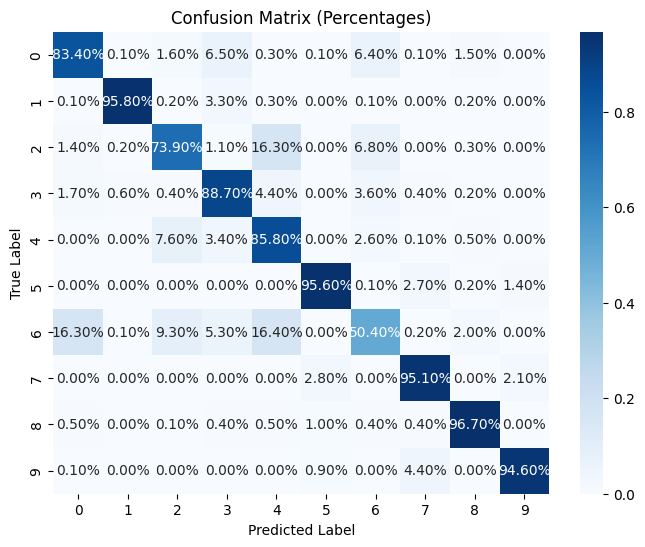

AUC: 0.9863706388888888


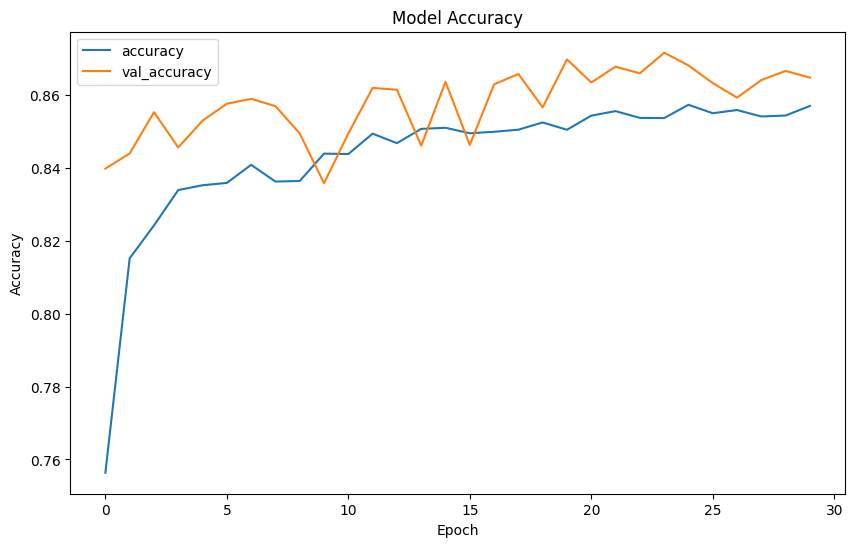

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (28, 28) for the model input
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# Convert labels to one-hot encoding (for 10 classes)
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the neural network model
model4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display model architecture
model4.summary()

# Train the model
history4 = model4.fit(train_images, train_labels, epochs=30,
                      batch_size=128, validation_split=0.1)

# Evaluate the model on test data
y_prob = model4.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate AUC score for ROC curve
auc = roc_auc_score(test_labels, y_prob, multi_class='ovr')
print("AUC:", auc)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)               

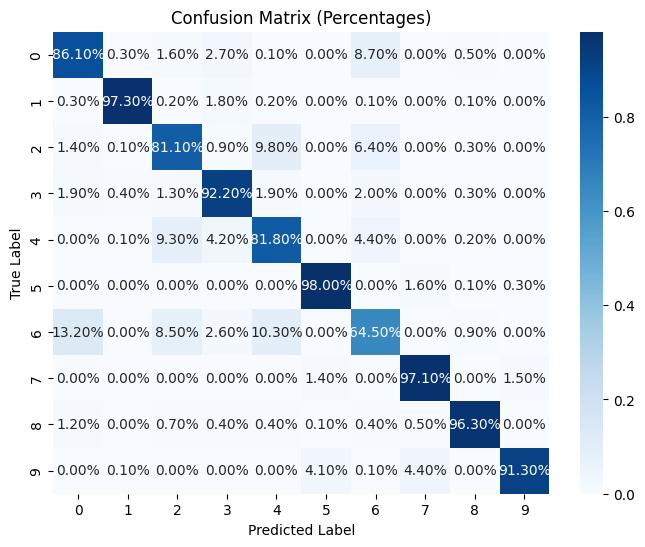

AUC: 0.9912732944444442


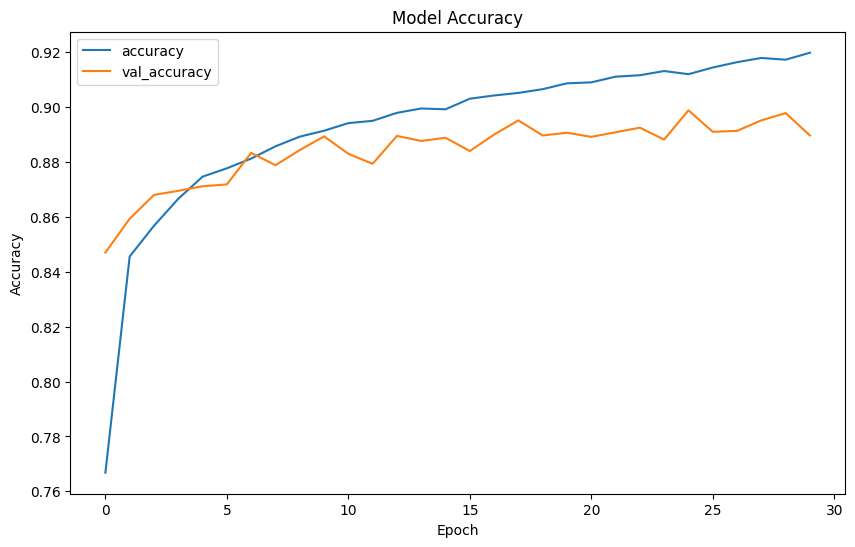

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (28, 28) for the model input
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# Convert labels to one-hot encoding (for 10 classes)
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the neural network model
model4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model4.compile(optimizer="adam",
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Display model architecture
model4.summary()

# Train the model
history4 = model4.fit(train_images, train_labels, epochs=30,
                      batch_size=128, validation_split=0.1)

# Evaluate the model on test data
y_prob = model4.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate AUC score for ROC curve
auc = roc_auc_score(test_labels, y_prob, multi_class='ovr')
print("AUC:", auc)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The bias vector gets initialized as zeros (In TensorFlow Dense layers)


The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

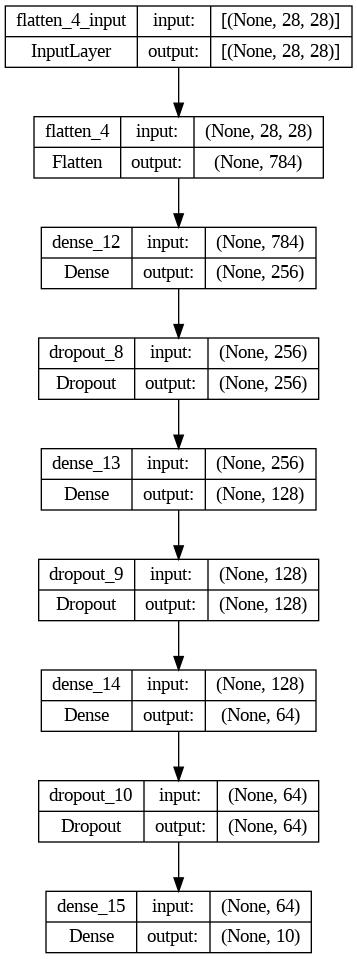

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes=True)